In this notebook, I will model a Sine wave with variable Volume over time, and then attempt to build a small neural network capable of returning beta coefficients for 4 variables: Magnitude, Phase Shift, Period, and Intercept. 

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [188]:
x = np.random.randint(100, size=1000)

In [189]:
x

array([81, 35, 38, 27, 56, 98, 32, 47, 84, 39, 89, 42, 57, 17, 39, 15, 85,
       29, 31, 43, 62, 83, 37, 84, 20, 18,  7, 62, 25, 14, 56, 40, 62, 24,
       42, 41, 90, 82, 99, 16, 22,  5, 31, 98, 18, 21, 86, 16, 60, 12,  1,
       86, 86,  4, 45, 45,  5, 31, 76, 74, 78, 71, 18, 64, 54, 60,  6, 63,
       80, 46, 18, 51, 34, 45, 62, 99, 72, 33, 44, 35, 65, 12,  0, 30, 47,
       15,  4, 89, 11, 56, 18, 77, 52, 18, 13, 12, 38, 36, 12, 69, 62,  2,
       37, 25, 40, 69, 90, 15, 20, 95, 84, 96, 73, 68, 62, 24, 55, 93, 97,
       83, 82, 95, 26, 54, 43, 79, 64, 36, 91, 69, 98, 72, 60, 87, 99, 67,
       39,  5, 66, 26,  1,  7, 26, 89, 15, 12, 78, 57,  5, 28, 76, 27,  8,
       47, 92, 85, 25, 20, 93, 82, 84, 86, 91, 89, 14, 42, 78, 84, 39, 58,
       13, 45, 78, 29, 94, 83, 74, 11, 55, 77, 92, 76, 13, 66, 55,  0, 34,
       45,  8, 74, 48, 37, 50, 82,  9, 23, 69, 62, 99, 16, 91, 72, 53,  9,
       32, 75, 16, 92,  8, 14, 43, 45, 41, 27, 21, 20, 81, 69, 23, 33, 74,
        7, 30, 14, 84, 96

In [190]:
x.shape

(1000,)

In [191]:
#x.reshape([100, 1])

In [192]:
Volume = np.random.randint(1000, size =1000)

In [193]:
Volume.shape

(1000,)

In [194]:
A = np.random.normal(10)
B = np.random.normal(20)
C = np.random.normal(5)
D = np.random.normal(30)

A, B, C, D

(11.33854048158589, 20.227439073541685, 7.127706775742832, 30.102762185420037)

In [205]:
# y = A sin( (x - B) / C)  + D

y = A* Volume * np.sin((x - B) / C) + D

In [206]:
y.shape

(1000,)

In [207]:
y2 = tf.constant([y.astype('float32')])

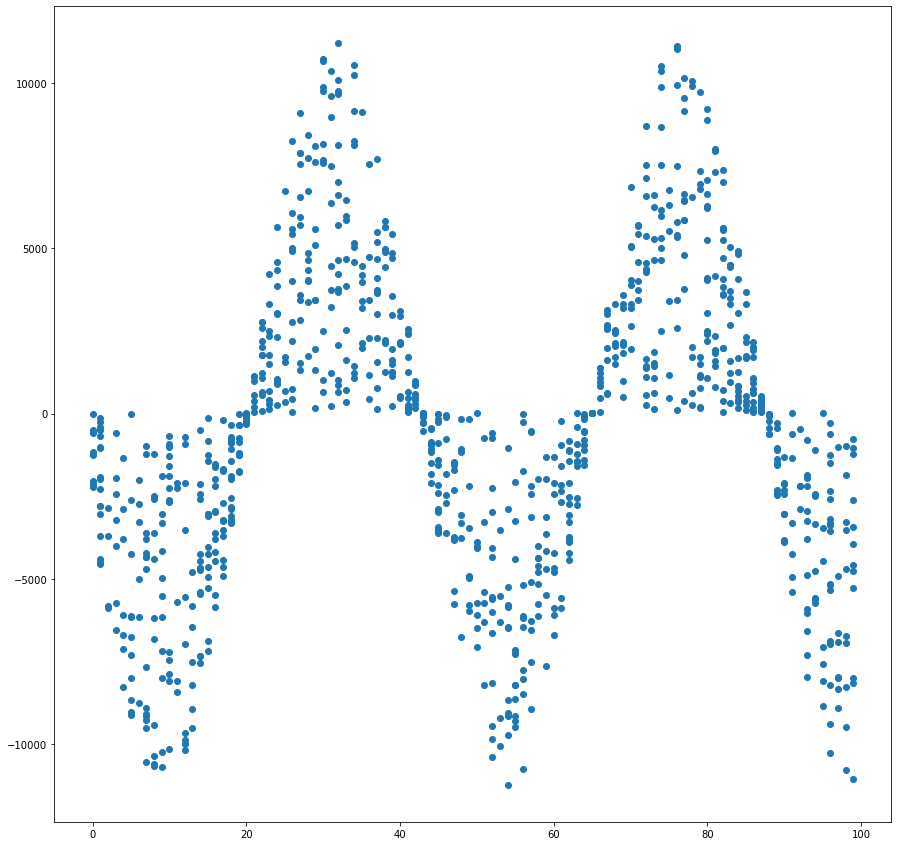

In [208]:
plt.figure(figsize=(15,15))
plt.scatter(x, y)

#### Build the modules or layers and then build the model 

Below is an example of layer modules and a class based model in tensorflow. I want to recreate this kind of code for a differentiable sine wave. 

In [32]:
### Example code
### https://www.tensorflow.org/guide

class Dense(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(
      tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.zeros([out_features]), name='b')
  def __call__(self, x):
    y = tf.matmul(x, self.w) + self.b
    return tf.nn.relu(y)

class SequentialModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=3, out_features=3)
    self.dense_2 = Dense(in_features=3, out_features=2)

  def __call__(self, x):
    x = self.dense_1(x)
    return self.dense_2(x)

# You have made a model!
my_model = SequentialModule(name="the_model")

# Call it, with random results
print("Model results:", my_model(tf.constant([[2.0, 2.0, 2.0]])))

Model results: tf.Tensor([[0.       5.220825]], shape=(1, 2), dtype=float32)


In [209]:
my_model.trainable_variables

(<tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'w:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.7629397 ,  1.6929085 , -1.3057007 ],
        [ 1.885677  , -1.6935259 ,  0.514856  ],
        [ 0.665248  , -0.3238645 , -0.23134466]], dtype=float32)>,
 <tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
 array([[-0.80214095,  1.4599743 ],
        [ 1.1160007 , -0.8088035 ],
        [ 0.5022122 , -0.28896183]], dtype=float32)>)

In [271]:
class Addition(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        self.b_1 = tf.Variable(tf.random.normal([inputs]), name='b1')
        #self.b_2 = tf.Variable(tf.zeros([inputs]), name='b2')
    def __call__(self, x):
        out = x + self.b_1
        #out = tf.math.multiply(out, self.b_1)
        return out
    
class Multiply(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        self.b_2 = tf.Variable(tf.random.normal([inputs]), name='b2')
    def __call__(self, x):
        out = tf.math.multiply(x, self.b_2)
        return out

class Sinusoid(tf.Module):
    def __init__(self, inputs, name=None):
        super().__init__(name=name)
        #self.b_3 = tf.Variable(tf.random.normal([inputs]), name='b3')
    def __call__(self, x):
        sine = tf.math.sin(x)
        return sine
    
class Inject(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        #self.b_4 = tf.Variable(tf.random.normal([inputs]), name='b4')
    def __call__(self, x, v):
        multiple = tf.math.multiply(v, x)
        #multiple = tf.math.multiply(multiple, self.b_4)
        return multiple
    
class Sine_Model(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        
        self.add_1 = Addition(inputs=1, name='B')
        self.mult_1 = Multiply(inputs=1, name='C')
        self.sin_1 = Sinusoid(inputs=1)
        self.inject_v = Inject()
        self.mult_2 = Multiply(inputs=1, name='A')
        self.add_2 = Addition(inputs=1, name='D')
        
    def __call__(self, x, v):
        x = self.add_1(x)
        x = self.mult_1(x)
        x = self.sin_1(x)
        x = self.inject_v(x, v)
        x = self.mult_2(x)
        x = self.add_2(x)
        return x
        

In [272]:
sine_model = Sine_Model(name='sine')

In [273]:
sine_model

In [274]:
sine_model.trainable_variables

(<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-0.34030482], dtype=float32)>,
 <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([0.04758892], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-1.9946529], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-0.25987527], dtype=float32)>)

In [275]:
x2 = tf.constant([x.astype('float32')])
v2 = tf.constant([Volume.astype('float32')])

In [276]:
x1 = tf.constant([[2.0, 3.0]])
v1 = tf.constant([[4.0, 5.0]])

In [277]:
x1, v1

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[4., 5.]], dtype=float32)>)

In [278]:
output = sine_model(x1, v1)


In [279]:
output

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.12717281, -1.0301021 ]], dtype=float32)>

In [285]:
# y = A sin( (x - B) / C)  + D
var_vals = []
for train_var in sine_model.trainable_variables:
    var_vals.append(train_var.numpy())
    
check_output = np.sin(var_vals[2]*(x1 + var_vals[0])) * v1*var_vals[3] + var_vals[1]

In [286]:
check_output

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.12717281, -1.0301021 ]], dtype=float32)>

In [287]:
output == check_output

<tf.Tensor: shape=(1, 2), dtype=bool, numpy=array([[ True,  True]])>

In [290]:
def check_output(x, v):
    output = sine_model(x, v)
    
    var_vals = []
    for train_var in sine_model.trainable_variables:
        var_vals.append(train_var.numpy())
        
    check_output = np.sin(var_vals[2]*(x + var_vals[0])) * v*var_vals[3] + var_vals[1]
    
    print(output == check_output)

In [296]:
check_output(x2, v2)

tf.Tensor(
[[ True False  True  True  True  True  True False  True  True  True  True
  False  True  True  True False  True  True  True  True  True  True  True
   True  True  True  True False  True  True  True  True  True  True  True
   True False False  True False  True  True  True  True  True False  True
   True  True  True  True False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True False  True  True  True False False  True  True  True
  False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True False  True  True  True  True
   True  True  True  True  True  True  True  True  True False  True  True
  False  True  True  True  True  True  True  True  True  True  True  True
   True False False  True  True  True  True  True  True  True  True  True
   True  True  True False  True  True  True  True  True False  True False
   True  True False False  

In [297]:
# model_results = sine_model(x2, v2)

# var_vals = []
# for train_var in sine_model.trainable_variables:
#     var_vals.append(train_var.numpy())
    
# check_results = np.sin(var_vals[3]*(x2 + var_vals[0])) * v2*var_vals[2] + var_vals[1]

In [298]:
#model_results == check_results

In [299]:
#model_results, check_results

#### Learn to solve for variables

In the next section, I will test gradient descent to optimize the beta coefficients and solve the function. 

In [300]:
model = sine_model

In [317]:
## Choose a loss object

## From the example
# loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam(learning_rate=10)

In [318]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
#train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
#test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# tf.keras.metrics.MeanSquaredError(
#     name='mean_squared_error', dtype=None
# )

In [319]:
# train the model

@tf.function
def train_step(x, v, y):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(x, v)
        loss = loss_object(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    #print(loss)
    train_loss(loss)
    #train_accuracy(labels, predictions)

In [320]:
# test the model 

@tf.function
def test_step(x, v, y):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(x, v)
    t_loss = loss_object(y, predictions)

    test_loss(t_loss)
    #test_accuracy(labels, predictions)

In [321]:
x2, v2, y2

(<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
 array([[81., 35., 38., 27., 56., 98., 32., 47., 84., 39., 89., 42., 57.,
         17., 39., 15., 85., 29., 31., 43., 62., 83., 37., 84., 20., 18.,
          7., 62., 25., 14., 56., 40., 62., 24., 42., 41., 90., 82., 99.,
         16., 22.,  5., 31., 98., 18., 21., 86., 16., 60., 12.,  1., 86.,
         86.,  4., 45., 45.,  5., 31., 76., 74., 78., 71., 18., 64., 54.,
         60.,  6., 63., 80., 46., 18., 51., 34., 45., 62., 99., 72., 33.,
         44., 35., 65., 12.,  0., 30., 47., 15.,  4., 89., 11., 56., 18.,
         77., 52., 18., 13., 12., 38., 36., 12., 69., 62.,  2., 37., 25.,
         40., 69., 90., 15., 20., 95., 84., 96., 73., 68., 62., 24., 55.,
         93., 97., 83., 82., 95., 26., 54., 43., 79., 64., 36., 91., 69.,
         98., 72., 60., 87., 99., 67., 39.,  5., 66., 26.,  1.,  7., 26.,
         89., 15., 12., 78., 57.,  5., 28., 76., 27.,  8., 47., 92., 85.,
         25., 20., 93., 82., 84., 86., 91., 89., 14., 42., 7

In [322]:
EPOCHS = 200

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    #train_accuracy.reset_states()
    test_loss.reset_states()
    #test_accuracy.reset_states()

    #for images, labels in train_ds:
    # from example code, commented out due to dealing with batches
    train_step(x2, v2, y2)

    #for test_images, test_labels in test_ds:
    test_step(x2, v2, y2)

    template = 'Epoch {}, Loss: {}, Test Loss: {}'
    print(template.format(epoch + 1,
                            train_loss.result(),
                            test_loss.result()))

Epoch 1, Loss: 21343166.0, Test Loss: 39106592.0
Epoch 2, Loss: 39106592.0, Test Loss: 22286238.0
Epoch 3, Loss: 22286238.0, Test Loss: 24422236.0
Epoch 4, Loss: 24422236.0, Test Loss: 32510748.0
Epoch 5, Loss: 32510748.0, Test Loss: 32196674.0
Epoch 6, Loss: 32196674.0, Test Loss: 23812432.0
Epoch 7, Loss: 23812432.0, Test Loss: 21353324.0
Epoch 8, Loss: 21353324.0, Test Loss: 22990930.0
Epoch 9, Loss: 22990930.0, Test Loss: 26687582.0
Epoch 10, Loss: 26687582.0, Test Loss: 27371254.0
Epoch 11, Loss: 27371254.0, Test Loss: 25069282.0
Epoch 12, Loss: 25069282.0, Test Loss: 22375694.0
Epoch 13, Loss: 22375694.0, Test Loss: 21325508.0
Epoch 14, Loss: 21325508.0, Test Loss: 21875616.0
Epoch 15, Loss: 21875616.0, Test Loss: 25485218.0
Epoch 16, Loss: 25485218.0, Test Loss: 24051844.0
Epoch 17, Loss: 24051844.0, Test Loss: 24040268.0
Epoch 18, Loss: 24040268.0, Test Loss: 21927488.0
Epoch 19, Loss: 21927488.0, Test Loss: 21536508.0
Epoch 20, Loss: 21536508.0, Test Loss: 21249672.0
Epoch 21,

Epoch 191, Loss: 21327114.0, Test Loss: 21306108.0
Epoch 192, Loss: 21306108.0, Test Loss: 21421682.0
Epoch 193, Loss: 21421682.0, Test Loss: 21482932.0
Epoch 194, Loss: 21482932.0, Test Loss: 21319336.0
Epoch 195, Loss: 21319336.0, Test Loss: 21330962.0
Epoch 196, Loss: 21330962.0, Test Loss: 21412772.0
Epoch 197, Loss: 21412772.0, Test Loss: 21208702.0
Epoch 198, Loss: 21208702.0, Test Loss: 21340042.0
Epoch 199, Loss: 21340042.0, Test Loss: 21460624.0
Epoch 200, Loss: 21460624.0, Test Loss: 21386830.0


In [307]:
sine_model.trainable_variables

(<tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([0.8691736], dtype=float32)>,
 <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-19.716175], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-2.0557485], dtype=float32)>,
 <tf.Variable 'b2:0' shape=(1,) dtype=float32, numpy=array([-0.841643], dtype=float32)>)

In [310]:
A, B, C, D

(11.33854048158589, 20.227439073541685, 7.127706775742832, 30.102762185420037)

In [308]:
y_predicted = sine_model(x2, v2)

In [309]:
y_predicted

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[-9.18769989e+01, -7.87580383e+02, -6.13788757e+02,
         4.65000244e+02, -4.31455963e+02,  3.89975891e+02,
        -1.72000015e+02, -2.74653473e+02, -2.16279068e+02,
         4.25297012e+01,  1.84370941e+02,  5.72078133e+01,
        -1.24822906e+02, -4.74146179e+02,  1.28930710e+02,
         5.28537903e+02,  1.87758286e+02, -6.48720276e+02,
         3.19974518e+02,  1.07648087e+00, -2.58123688e+02,
         5.37116585e+01,  1.30348602e+02, -1.25107346e+02,
        -4.30319794e+02,  1.69939102e+02, -3.38175507e+02,
        -2.15295990e+02, -2.13373184e+00, -5.70433472e+02,
        -3.19638306e+02,  2.93709320e+02, -1.09654343e+02,
         6.41877747e+00,  1.26309395e+00, -6.20404701e+01,
        -8.24330444e+02,  4.98926941e+02, -7.54175903e+02,
        -5.20901184e+01,  7.11543884e+01, -3.05829926e+02,
        -1.26392860e+01,  6.37026367e+02,  2.13246201e+02,
         2.86846985e+02,  3.60663544e+02, -4.47601700e+01,
     

In [236]:
y2

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[ 8.10790161e+02,  9.13599707e+03,  4.96547607e+03,
         7.87980469e+03, -8.48849609e+03, -6.71498340e+03,
         2.07567212e+03, -2.29726147e+03,  1.25496350e+03,
         1.50782996e+03, -1.04211438e+03,  5.82520386e+02,
        -3.12970508e+03, -3.22892041e+03,  3.55900342e+03,
        -5.26011816e+03,  1.67760742e+03,  8.10056885e+03,
         1.03525947e+04,  1.13620443e+01, -3.07627832e+03,
         1.60010901e+03,  2.28184424e+03,  6.86836609e+02,
        -1.69940460e+02, -8.55328674e+02, -9.07748047e+03,
        -2.51824585e+03,  6.84574463e+02, -7.55047949e+03,
        -6.17506934e+03,  2.13243213e+03, -1.14176562e+03,
         2.64826782e+02,  1.80762115e+02,  1.65496140e+02,
        -3.85869287e+03,  7.38254590e+03, -1.10415908e+04,
        -1.98522021e+03,  2.75946777e+03, -6.74751074e+03,
         2.45154678e+02, -1.07823721e+04, -1.05751379e+03,
         5.69789917e+02,  2.16332520e+03, -1.52892065e+03,
     